# Preprocessing

Imports

In [ ]:
import numpy             as np
import matplotlib.pyplot as plt
import tensorflow        as tf

Importing Drive and unzipinig the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#!wget https://data.mendeley.com/public-files/datasets/rscbjbr9sj/files/5699a1d8-d1b6-45db-bb92-b61051445347/file_downloaded

!unzip drive/MyDrive/Eye/EyeD

Streaming output truncated to the last 5000 lines.
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-8076309-3.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-224974-31.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-3541867-4.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-7599844-1.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-6625388-3.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-8086850-114.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-5811898-40.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-8986660-45.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-1283307-15.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-9540117-28.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-7563760-33.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-5443411-6.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-5768756-12.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-2257047-100.jpeg  
 

Determining the batch size

In [ ]:
batch_size = 8

Defining the data generators

In [ ]:
DME_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

Normal_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

CNV_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

DRUSSEN_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

In [ ]:
DME_data = DME_datagen.flow_from_directory(
    'OCT2017/train/DMED',
    target_size = (256,256),
    batch_size  = batch_size * 3,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 11348 images belonging to 1 classes.


In [ ]:
Normal_data = Normal_datagen.flow_from_directory(
    'OCT2017/train/NORMALD',
    target_size = (256,256),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 26315 images belonging to 1 classes.


In [ ]:
CNV_data = CNV_datagen.flow_from_directory(
    'OCT2017/train/CNVD',
    target_size = (256,256),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 37205 images belonging to 1 classes.


In [ ]:
DRUSSEN_data = DRUSSEN_datagen.flow_from_directory(
    'OCT2017/train/DRUSSEND',
    target_size = (256,256),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 8616 images belonging to 1 classes.


In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255
)

test_data = test_datagen.flow_from_directory(
    'OCT2017/test',
    target_size = (256,256),
    batch_size  = batch_size * 4,
    color_mode  = "grayscale",
    classes = ['DMED', 'OTHER']
)

Found 1000 images belonging to 2 classes.


#Building the Model

Defining the Custom Activation Function

In [ ]:
# custom activation function
def custom_activation(output):
  logexpsum = tf.keras.backend.sum(tf.keras.backend.exp(output), axis=-1, keepdims=True)
  result    = logexpsum / (logexpsum + 1.0)

  return result

Defining Discriminator and the Classification model

In [ ]:
def define_discriminator(in_shape=(256,256,1), n_classes=2):
  in_image = tf.keras.layers.Input(shape=in_shape)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(in_image)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dropout(0.2)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dropout(0.2)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dropout(0.2)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Flatten()(fe)
  fe = tf.keras.layers.Dropout(0.4)(fe)
  fe = tf.keras.layers.Dense(n_classes)(fe)

  c_out_layer = tf.keras.layers.Activation("softmax")(fe)
  c_model     = tf.keras.models.Model(in_image, c_out_layer)
  c_model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005,  beta_1 = 0.5), metrics = ["accuracy"])
  #tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2)

  d_out_layer = tf.keras.layers.Lambda(custom_activation)(fe)
  d_model     = tf.keras.models.Model(in_image, d_out_layer)
  d_model.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005, beta_1 = 0.5))
  return d_model, c_model

Defining the Generator

In [ ]:
def define_generator(latent_dim):
  in_lat  = tf.keras.layers.Input(shape=(latent_dim,))
  n_nodes = 128 * 8 * 8

  gen = tf.keras.layers.Dense(n_nodes)(in_lat)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)
  gen = tf.keras.layers.Reshape((8, 8, 128))(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  out_layer = tf.keras.layers.Conv2D(1, (7,7), activation = "tanh", padding = "same")(gen)

  model = tf.keras.models.Model(in_lat, out_layer)
  return model

Defining GAN

In [ ]:
def define_gan(g_model, d_model):
  d_model.trainable = False

  gan_output = d_model(g_model.output)
  model      = tf.keras.models.Model(g_model.input, gan_output)
  opt        = tf.keras.optimizers.Adam(learning_rate = 0.00005, beta_1 = 0.5)
  model.compile(loss="binary_crossentropy", optimizer=opt)

  return model

How to generate real samples

In [ ]:
def generate_real_samples():
  X_DME     = DME_data.next()
  Y_DME     = np.array([1,0] * X_DME.shape[0]).reshape(X_DME.shape[0], -1)
  X_Normal  = Normal_data.next()
  Y_Normal  = np.array([0,1] * X_Normal.shape[0]).reshape(X_Normal.shape[0], -1)
  X_CNV     = CNV_data.next()
  Y_CNV     = np.array([0,1] * X_CNV.shape[0]).reshape(X_CNV.shape[0], -1)
  X_DRUSSEN = DRUSSEN_data.next()
  Y_DRUSSEN = np.array([0,1] * X_DRUSSEN.shape[0]).reshape(X_DRUSSEN.shape[0], -1)

  X       = np.concatenate([X_DME, X_Normal, X_CNV, X_DRUSSEN])
  labels  = np.concatenate([Y_DME, Y_Normal, Y_CNV, Y_DRUSSEN])
  y       = np.ones((X.shape[0], 1))

  return [X, labels], y

How to generate fake samples

In [ ]:
def generate_latent_points(latent_dim, n_samples):
  z_input = np.random.randn(latent_dim * n_samples)
  z_input = z_input.reshape(n_samples, latent_dim)
  return z_input

def generate_fake_samples(generator, latent_dim, n_samples):
  z_input = generate_latent_points(latent_dim, n_samples)
  images  = generator.predict(z_input)
  y       = np.zeros((n_samples, 1))
  return images, y

#Training the Model

Defining the train function

In [ ]:
def train(g_model, d_model, c_model, gan_model, latent_dim, n_epochs , batch_size):
  bat_per_epo = 2000

  for i in range(bat_per_epo * n_epochs):
    [Xsup_real, ysup_real], y_real = generate_real_samples()
    c_loss, c_acc                  = c_model.train_on_batch(Xsup_real, ysup_real)

    d_loss1        = d_model.train_on_batch(Xsup_real, y_real)
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, 4 * batch_size)
    d_loss2        = d_model.train_on_batch(X_fake, y_fake)

    X_gan, y_gan = generate_latent_points(latent_dim, 4 * batch_size), np.ones((4 * batch_size, 1))
    g_loss       = gan_model.train_on_batch(X_gan, y_gan)

    print(">%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]" % (i+1, c_loss, c_acc*100, d_loss1, d_loss2, g_loss))

  return c_model.evaluate(test_data)

Defining the models and latent dimension

In [ ]:
latent_dim = 100

d_model, c_model = define_discriminator()
g_model          = define_generator(latent_dim)
gan_model        = define_gan(g_model, d_model)

Loading model weights

In [ ]:
d_model.load_weights('/content/drive/MyDrive/GAN_weights_DME_DO/saved_model/d_model/w')
c_model.load_weights('/content/drive/MyDrive/GAN_weights_DME_DO/saved_model/c_model/w')
g_model.load_weights('/content/drive/MyDrive/GAN_weights_DME_DO/saved_model/g_model/w')

Training the model and saving the Accuracy and Loss of test data in history

In [ ]:
history = list()

In [ ]:
history.append(train(g_model, d_model, c_model, gan_model, latent_dim, n_epochs = 1, batch_size = batch_size))

>1, c[0.135,95], d[0.527,0.307], g[2.745]
>2, c[0.177,94], d[0.471,0.422], g[2.597]
>3, c[0.376,85], d[0.399,0.364], g[2.822]
>4, c[0.501,79], d[0.412,0.722], g[2.964]
>5, c[0.350,90], d[0.685,0.255], g[2.725]
>6, c[0.213,96], d[0.472,0.655], g[2.835]
>7, c[0.191,94], d[0.523,0.263], g[2.907]
>8, c[0.181,94], d[0.425,0.230], g[2.857]
>9, c[0.238,90], d[0.564,0.886], g[3.415]
>10, c[0.195,94], d[0.671,0.170], g[3.277]
>11, c[0.236,85], d[0.503,0.254], g[2.577]
>12, c[0.155,94], d[0.459,0.658], g[2.445]
>13, c[0.310,85], d[0.510,0.480], g[2.283]
>14, c[0.279,85], d[0.710,0.472], g[3.269]
>15, c[0.317,83], d[0.748,0.114], g[2.580]
>16, c[0.311,85], d[0.302,0.736], g[3.040]
>17, c[0.457,83], d[0.703,0.253], g[2.179]
>18, c[0.185,94], d[0.376,0.207], g[2.547]
>19, c[0.258,88], d[0.473,0.550], g[2.733]
>20, c[0.329,81], d[0.397,0.235], g[2.377]
>21, c[0.172,92], d[0.322,0.400], g[3.116]
>22, c[0.425,79], d[0.364,0.326], g[2.934]
>23, c[0.103,96], d[0.377,0.199], g[3.325]
>24, c[0.411,83], d[

Evaluting C-Model on the test data

In [ ]:
c_model.evaluate(test_data)

32/32 [==============================] - 3s 91ms/step - loss: 0.1960 - accuracy: 0.9300


[0.19604668021202087, 0.9300000071525574]

Saving Weights

In [ ]:
d_model.save_weights('/content/drive/MyDrive/GAN_weights_DME_DO/saved_model/d_model/w')
c_model.save_weights('/content/drive/MyDrive/GAN_weights_DME_DO/saved_model/c_model/w')
g_model.save_weights('/content/drive/MyDrive/GAN_weights_DME_DO/saved_model/g_model/w')

# c_model.save_weights('/content/drive/MyDrive/GAN_weights_DME_DO/best c model/c_model/w')

# Testing Generative Model

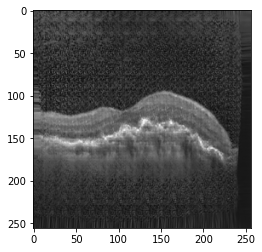

In [ ]:
fake = g_model.predict(generate_latent_points(100, 1))
plt.imshow(fake[0,:,:,0], cmap= "gray")

In [ ]:
test_DMEgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
)

test_DME = test_DMEgen.flow_from_directory(
    'OCT2017/test/DMED',
    target_size = (256,256),
    batch_size  = batch_size * 4,
    color_mode  = "grayscale",
    class_mode  = None,
)

test_OTHERgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
)

test_OTHER = test_OTHERgen.flow_from_directory(
    'OCT2017/test/OTHER',
    target_size = (256,256),
    batch_size  = batch_size * 4,
    color_mode  = "grayscale",
    class_mode  = None,
)

Found 250 images belonging to 1 classes.
Found 750 images belonging to 3 classes.


In [ ]:
predictDME   = c_model.predict(test_DME)
predictOTHER = c_model.predict(test_OTHER)

predictDME   = [np.argmax(i) for i in predictDME]
predictOTHER = [np.argmax(i) for i in predictOTHER]

In [ ]:
true_DME   = np.array([0] * 250)
true_OTHER = np.array([1] * 750)

In [ ]:
DMEmetrics = tf.keras.metrics.Accuracy()
DMEmetrics.update_state(true_DME, predictDME)
OTHERmetrics = tf.keras.metrics.Accuracy()
OTHERmetrics.update_state(true_OTHER, predictOTHER)
print(f"DME: {DMEmetrics.result().numpy()}, OTHER: {OTHERmetrics.result().numpy()}")

DME: 0.9120000004768372, OTHER: 0.9613333344459534
